Change directory to appropriate file for each mode

In [102]:
import os
os.chdir("/Users/liorshefler/Documents/Fall2022/Research/MAST_2022-09-07T1447/JWST/jw01386-o013_t004_nirspec_g140h-f100lp")

In [103]:
import time

import numpy as np

import scipy

import specutils
from specutils import Spectrum1D

from jdaviz import CubeViz

from astropy.io import fits

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [105]:
# NIRSpec IFU science data cube

filename1 ="jw01386-o013_t004_nirspec_g140h-f100lp_s3d.fits"


# Open and inspect the file and WCS
# Load with astropy.fits.open
with fits.open(filename1, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    hdulist.info()
    print(w)
    
# Load with Spectrum1D    
spec1d = Spectrum1D.read(filename1)

# Wavelengths - *Number the wavelengths 1-3 for the 3 modes respectivley 
wavelength1 = np.array(spec1d.spectral_axis.value)
print(wavelength1)


Filename: jw01386-o013_t004_nirspec_g140h-f100lp_s3d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     353   ()      
  1  SCI           1 ImageHDU        92   (69, 65, 3703)   float32   
  2  ERR           1 ImageHDU        12   (69, 65, 3703)   float32   
  3  DQ            1 ImageHDU        12   (69, 65, 3703)   int32 (rescales to uint32)   
  4  WMAP          1 ImageHDU        10   (69, 65, 3703)   float32   
  5  HDRTAB        1 BinTableHDU    816   8R x 403C   [23A, 5A, 3A, 44A, 7A, 13A, 6A, 5A, 7A, 13A, 4A, L, D, D, D, D, 32A, 47A, 70A, 14A, 3A, D, 28A, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 24A, 11A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 9A, 23A, 5A, D, D, D, D, D, D, 27A, D, D, 7A, 7A, 4A, D, D, 6A, D, D, 5A, D, D, K, D, D, D, D, D, D, D, 4A, 3A, D, D, D, D, D, D, D, D, D, K, 5A, 7A, D, D, D, D, D, D, D, D, D, 12A, D, D, D, K, D, D, K, K, D, D, K, K, K, K, K, D, D, D, D, D, D, D, D, K, K, L, L, K, K

In [106]:
cubeviz = CubeViz()
cubeviz.app

Application(config='cubeviz', events=['call_viewer_method', 'close_snackbar_message', 'data_item_remove', 'dat…

In [107]:
cubeviz.app.load_data(filename1)


# Using CubeViz

- Use the bottom plot to scrub through the cube data and find a clear image of the target
- Right click the zoom tool (magnifying glass) and change it the the interactive pan/zoom tool (cross with arrows)
- Zoom in on the target and center it
- Use the selection tool (circle with two dots inside, three dots outside) to select a region that includes all or most of the pixles of the target (this is Subset 1)

In [108]:
cubeviz_data = cubeviz.app.data_collection[0]
try:
    region1 = cubeviz_data.get_selection_definition(format='astropy-regions')
    print(region1)
    region1_exists = True
except Exception:
    print("There are no regions selected in the cube viewer.")
    region1_exists = False

Region: CirclePixelRegion
center: PixCoord(x=35.082313537597656, y=33.78614044189453)
radius: 2.937643051147461


Use the selected region to create a sebset of the full spectrum, including just the target

In [109]:
try:
    spectrum_subset1 = cubeviz.app.get_data_from_viewer('spectrum-viewer')['Subset 1']
    print(spectrum_subset1)
except Exception:
    print("There are no subsets selected in the spectrum viewer.")

Spectrum1D (length=3703)
flux:             [ 1.3877 MJy, ..., 2.5595 MJy ],  mean=65.497 MJy
spectral axis:    [ 1.0001 um, ..., 1.87 um ],  mean=1.435 um


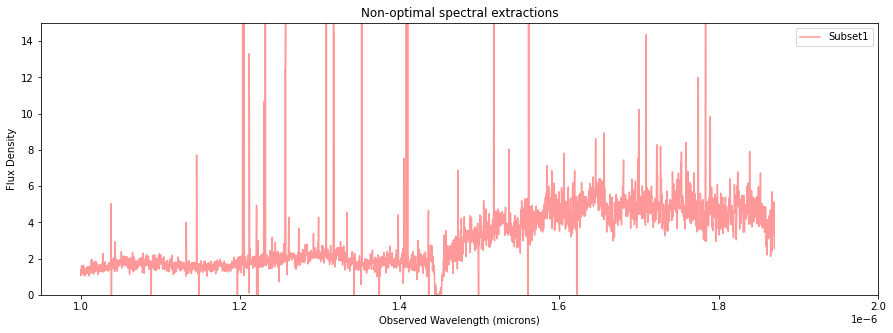

In [110]:
f, (ax1) = plt.subplots(1, 1, figsize=(15, 5)) 

ax1.set_title("Non-optimal spectral extractions")
ax1.set_xlabel("Observed Wavelength (microns)")  
ax1.set_ylabel("Flux Density")
ax1.set_xlim(.00000095, .000002)
ax1.set_ylim(0, 15)

try:
    ax1.plot(wavelength1, spectrum_subset1.flux.value, c='r', label="Subset1", alpha=0.4)
except Exception:
    print("There is no Cubeviz Subset1 spectrum to plot.")
    
ax1.legend()

plt.show()

In [111]:
nirspec_g140h_f100lp = spectrum_subset1

Now repeat the process for the other two modes

In [112]:
os.chdir("/Users/liorshefler/Documents/Fall2022/Research/MAST_2022-09-07T1447/JWST/jw01386-o013_t004_nirspec_g235h-f170lp")

In [113]:
# NIRSpec IFU science data cube

filename2 ="jw01386-o013_t004_nirspec_g235h-f170lp_s3d.fits"


# Open and inspect the file and WCS
# Load with astropy.fits.open
with fits.open(filename2, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    hdulist.info()
    print(w)
    
# Load with Spectrum1D    
spec1d = Spectrum1D.read(filename2)

# Wavelengths
wavelength2 = np.array(spec1d.spectral_axis.value)
print(wavelength2)

Filename: jw01386-o013_t004_nirspec_g235h-f170lp_s3d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     353   ()      
  1  SCI           1 ImageHDU        92   (69, 65, 3663)   float32   
  2  ERR           1 ImageHDU        12   (69, 65, 3663)   float32   
  3  DQ            1 ImageHDU        12   (69, 65, 3663)   int32 (rescales to uint32)   
  4  WMAP          1 ImageHDU        10   (69, 65, 3663)   float32   
  5  HDRTAB        1 BinTableHDU    816   8R x 403C   [23A, 5A, 3A, 44A, 7A, 13A, 6A, 5A, 7A, 13A, 4A, L, D, D, D, D, 32A, 47A, 70A, 14A, 3A, D, 28A, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 24A, 11A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 9A, 23A, 5A, D, D, D, D, D, D, 27A, D, D, 7A, 7A, 4A, D, D, 6A, D, D, 5A, D, D, K, D, D, D, D, D, D, D, 4A, 3A, D, D, D, D, D, D, D, D, D, K, 5A, 7A, D, D, D, D, D, D, D, D, D, 12A, D, D, D, K, D, D, K, K, D, D, K, K, K, K, K, D, D, D, D, D, D, D, D, K, K, L, L, K, K

In [114]:
cubeviz = CubeViz()
cubeviz.app

Application(config='cubeviz', events=['call_viewer_method', 'close_snackbar_message', 'data_item_remove', 'dat…

In [115]:
cubeviz.app.load_data(filename2)

# Note:

Select *Subset 2* 
(Create a Subset 1, then click the drop down where it says "Subset 1" and delete it, then reselect the region)

In [116]:
cubeviz_data = cubeviz.app.data_collection[0]
try:
    region1 = cubeviz_data.get_selection_definition(format='astropy-regions')
    print(region1)
    region1_exists = True
except Exception:
    print("There are no regions selected in the cube viewer.")
    region1_exists = False

Region: CirclePixelRegion
center: PixCoord(x=35.24886703491211, y=33.23862075805664)
radius: 3.453444480895996


In [117]:
try:
    spectrum_subset2 = cubeviz.app.get_data_from_viewer('spectrum-viewer')['Subset 2']
    print(spectrum_subset2)
except Exception:
    print("There are no subsets selected in the spectrum viewer.")

Spectrum1D (length=3663)
flux:             [ 4.6112 MJy, ..., 3.6855 MJy ],  mean=5.1976 MJy
spectral axis:    [ 1.7 um, ..., 3.1501 um ],  mean=2.425 um


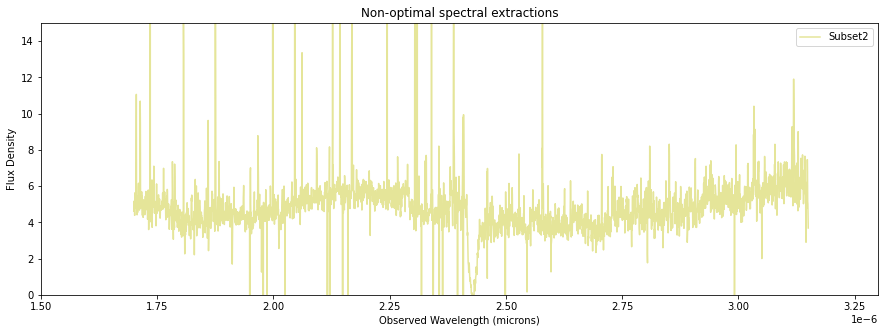

In [118]:
f, (ax1) = plt.subplots(1, 1, figsize=(15, 5)) 

ax1.set_title("Non-optimal spectral extractions")
ax1.set_xlabel("Observed Wavelength (microns)")  
ax1.set_ylabel("Flux Density")
ax1.set_xlim(.0000015, .0000033)
ax1.set_ylim(0, 15)

try:
    ax1.plot(wavelength2, spectrum_subset2.flux.value, c='y', label="Subset2", alpha=0.4)
except Exception:
    print("There is no Cubeviz Subset1 spectrum to plot.")
    
ax1.legend()

plt.show()

In [119]:
nirspec_g235h_f170lp = spectrum_subset2

In [120]:
os.chdir("/Users/liorshefler/Documents/Fall2022/Research/MAST_2022-09-07T1447/JWST/jw01386-o013_t004_nirspec_g395h-f290lp")

In [121]:
# NIRSpec IFU science data cube

filename3 ="jw01386-o013_t004_nirspec_g395h-f290lp_s3d.fits"


# Open and inspect the file and WCS
# Load with astropy.fits.open
with fits.open(filename3, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    hdulist.info()
    print(w)
    
# Load with Spectrum1D    
spec1d = Spectrum1D.read(filename3)

# Wavelengths
wavelength3 = np.array(spec1d.spectral_axis.value)
print(wavelength3)

Filename: jw01386-o013_t004_nirspec_g395h-f290lp_s3d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     353   ()      
  1  SCI           1 ImageHDU        92   (69, 65, 3460)   float32   
  2  ERR           1 ImageHDU        12   (69, 65, 3460)   float32   
  3  DQ            1 ImageHDU        12   (69, 65, 3460)   int32 (rescales to uint32)   
  4  WMAP          1 ImageHDU        10   (69, 65, 3460)   float32   
  5  HDRTAB        1 BinTableHDU    816   8R x 403C   [23A, 5A, 3A, 44A, 7A, 13A, 6A, 5A, 7A, 13A, 4A, L, D, D, D, D, 32A, 47A, 70A, 14A, 3A, D, 28A, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 24A, 11A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 9A, 23A, 5A, D, D, D, D, D, D, 27A, D, D, 7A, 7A, 4A, D, D, 6A, D, D, 5A, D, D, K, D, D, D, D, D, D, D, 4A, 3A, D, D, D, D, D, D, D, D, D, K, 5A, 7A, D, D, D, D, D, D, D, D, D, 12A, D, D, D, K, D, D, K, K, D, D, K, K, K, K, K, D, D, D, D, D, D, D, D, K, K, L, L, K, K

In [122]:
cubeviz = CubeViz()
cubeviz.app

Application(config='cubeviz', events=['call_viewer_method', 'close_snackbar_message', 'data_item_remove', 'dat…

In [123]:
cubeviz.app.load_data(filename3)

# Note:

Select *Subset 3*

In [124]:
cubeviz_data = cubeviz.app.data_collection[0]
try:
    region1 = cubeviz_data.get_selection_definition(format='astropy-regions')
    print(region1)
    region1_exists = True
except Exception:
    print("There are no regions selected in the cube viewer.")
    region1_exists = False

Region: CirclePixelRegion
center: PixCoord(x=35.35178756713867, y=33.79505920410156)
radius: 4.060009956359863


In [125]:
try:
    spectrum_subset3 = cubeviz.app.get_data_from_viewer('spectrum-viewer')['Subset 3']
    print(spectrum_subset3)
except Exception:
    print("There are no subsets selected in the spectrum viewer.")

Spectrum1D (length=3460)
flux:             [ 3.7402 MJy, ..., 9.7029 MJy ],  mean=3.4776 MJy
spectral axis:    [ 2.9 um, ..., 5.2003 um ],  mean=4.0502 um


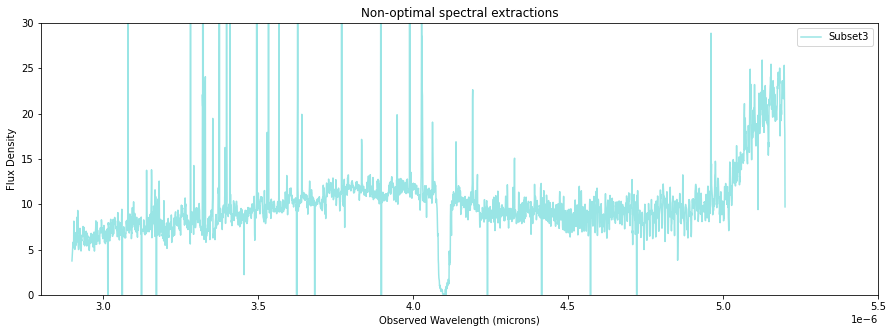

In [127]:
f, (ax1) = plt.subplots(1, 1, figsize=(15, 5)) 

ax1.set_title("Non-optimal spectral extractions")
ax1.set_xlabel("Observed Wavelength (microns)")  
ax1.set_ylabel("Flux Density")
ax1.set_xlim(.0000028, .0000055)
ax1.set_ylim(0, 30)

try:
    ax1.plot(wavelength3, spectrum_subset3.flux.value, c='c', label="Subset3", alpha=0.4)
except Exception:
    print("There is no Cubeviz Subset1 spectrum to plot.")
    
ax1.legend()

plt.show()

In [128]:
nirspec_g395h_f290lp = spectrum_subset3

Now plot the combined spectrum from all three modes

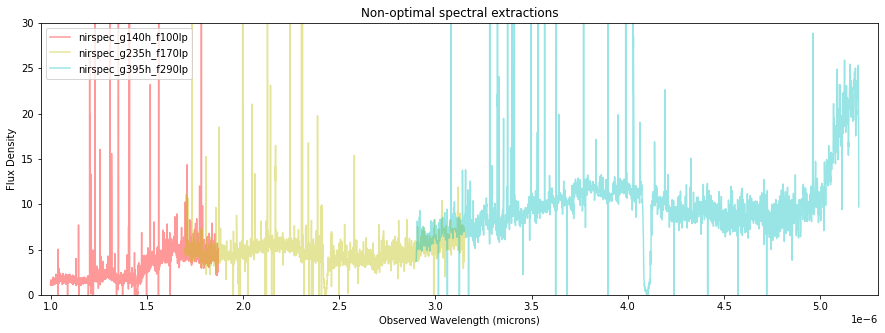

In [130]:
f, (ax1) = plt.subplots(1, 1, figsize=(15, 5)) 

ax1.set_title("Non-optimal spectral extractions")
ax1.set_xlabel("Observed Wavelength (microns)")  
ax1.set_ylabel("Flux Density")
ax1.set_xlim(.00000095, .0000053)
ax1.set_ylim(0, 30)


ax1.plot(wavelength1, nirspec_g140h_f100lp.flux.value, c='r', label="nirspec_g140h_f100lp", alpha=0.4)

ax1.plot(wavelength2, nirspec_g235h_f170lp.flux.value, c='y', label="nirspec_g235h_f170lp", alpha=0.4)

ax1.plot(wavelength3, nirspec_g395h_f290lp.flux.value, c='c', label="nirspec_g395h_f290lp", alpha=0.4)

    
ax1.legend()

plt.show()

